In [1]:
import pandas as pd
import datetime
import os
import re
import flair
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from textblob import TextBlob

# Show entire column
pd.set_option("display.max_colwidth", -1)

<ipython-input-1-16a9c7deb5f4>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [2]:
cd = os.getcwd()
processed_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/processed/"

In [3]:
full_tweet_df = pd.read_csv(processed_data_directory_path + "main_df.csv")
full_tweet_df = full_tweet_df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [4]:
full_tweet_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,day_date,...,open_value,high_value,low_value,return,sent_scores,compound,tweet_sent,positive,negative,reaction_num
0,550517928399888384,jrs101780,2015-01-01,@davenathan I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,1,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7769}",0.7769,pos,1,0,1
1,550518033622368256,bobcatturner,2015-01-01,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via @daily_finance $AAPL $MU $MAR",0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.184, 'neu': 0.649, 'pos': 0.168, 'compound': -0.0772}",-0.0772,neg,0,1,0
2,550520264228737024,MilesGeauxbye,2015-01-01,GOOD LUCK“@WSJ: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5622}",0.5622,pos,1,0,0
3,550521659044552706,bullandbearmash,2015-01-01,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",0,0,0,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,0
4,550523990243295232,TCBFx,2015-01-01,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,0,0,1,AAPL,apple,2015-01-01,...,112.82,113.13,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,1


# Sentiment Classification - Flair

In [5]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-07-25 19:04:00,870 loading file /Users/sumedhshah1994/.flair/models/sentiment-en-mix-distillbert_4.pt


In [19]:
def clean_tweet(tweet):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    user = re.compile(r"(?i)@[a-z0-9_]+")

    # we then use the sub method to replace anything matching
    tweet = whitespace.sub(' ', tweet)
    tweet = web_address.sub('', tweet)
    tweet = user.sub('', tweet)
    
    return tweet


def predict_sentiment(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
    return sentence.labels[0]

def get_sentiment_score(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
    if sentence.labels[0].value=='NEGATIVE':
        return sentence.labels[0].score*-1
    else:
        return sentence.labels[0].score





In [20]:
# Condense to to 1000 rows
test_df = full_tweet_df[:1000]

# Clean tweet
test_df["clean_tweet"] = test_df["body"].apply(clean_tweet)

#test_df["sentiment"] = test_df["clean_tweet"].apply(predict_sentiment)

# Get flair sentiment score
test_df["flair_sentiment_score"] = test_df["clean_tweet"].apply(get_sentiment_score)


/Users/sumedhshah1994/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [21]:
test_df

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,day_date,...,low_value,return,sent_scores,compound,tweet_sent,positive,negative,reaction_num,clean_tweet,flair_sentiment_score
0,550517928399888384,jrs101780,2015-01-01,@davenathan I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,1,0,0,AAPL,apple,2015-01-01,...,110.21,NaN,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7769}",0.7769,pos,1,0,1,I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,-0.999651
1,550518033622368256,bobcatturner,2015-01-01,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via @daily_finance $AAPL $MU $MAR",0,0,0,AAPL,apple,2015-01-01,...,110.21,NaN,"{'neg': 0.184, 'neu': 0.649, 'pos': 0.168, 'compound': -0.0772}",-0.0772,neg,0,1,0,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via $AAPL $MU $MAR",-0.911887
2,550520264228737024,MilesGeauxbye,2015-01-01,GOOD LUCK“@WSJ: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,0,0,0,AAPL,apple,2015-01-01,...,110.21,NaN,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5622}",0.5622,pos,1,0,0,GOOD LUCK“: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,-0.999532
3,550521659044552706,bullandbearmash,2015-01-01,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",0,0,0,AAPL,apple,2015-01-01,...,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,0,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",-0.986848
4,550523990243295232,TCBFx,2015-01-01,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,0,0,1,AAPL,apple,2015-01-01,...,110.21,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,1,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,-0.578818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,551110986422157312,MacHashNews,2015-01-02,Waterlogue color paint app offered at no cost inside Apple Store app http://dlvr.it/80FgHN #iDownloadBlog $AAPL,0,0,0,AAPL,apple,2015-01-02,...,107.35,-0.009513,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}",-0.2960,neg,0,1,0,Waterlogue color paint app offered at no cost inside Apple Store app http://dlvr.it/80FgHN #iDownloadBlog $AAPL,-0.714464
996,551111118132117504,Stockaholics,2015-01-02,Our Penny Stock Picks Gained Over 968% In the Past 5 Weeks! Get our next pick early: http://tinyurl.com/p46mnk2 $IBM $GOOG $AAPL,0,0,0,AAPL,apple,2015-01-02,...,107.35,-0.009513,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4389}",0.4389,pos,1,0,0,Our Penny Stock Picks Gained Over 968% In the Past 5 Weeks! Get our next pick early: http://tinyurl.com/p46mnk2 $IBM $GOOG $AAPL,-0.768803
997,551111715338067968,OptiontradinIQ,2015-01-02,"$AAPL come to me, PAPA will be waiting",0,0,2,AAPL,apple,2015-01-02,...,107.35,-0.009513,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,2,"$AAPL come to me, PAPA will be waiting",-0.990095
998,551111844468125696,Chart_Guy,2015-01-02,we're getting the same trading action in $aapl and the markets as we did in sept & Oct,0,0,0,AAPL,apple,2015-01-02,...,107.35,-0.009513,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,0,we're getting the same trading action in $aapl and the markets as we did in sept & Oct,-0.986319


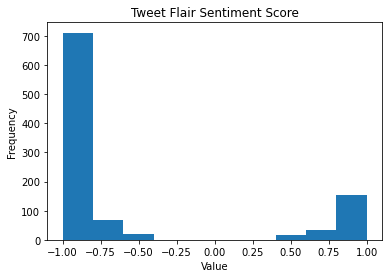

In [22]:
# View tweet polarity
plt.hist(test_df['flair_sentiment_score'])
#plt.xticks(range(-1,2))
plt.title('Tweet Flair Sentiment Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Sentiment Classification - TextBlob

In [23]:
def predict_textblob_sentiment(input_tweet):
    input_tweet['TB_polarity'] = TextBlob(input_tweet["clean_tweet"]).sentiment.polarity
    input_tweet['TB_subjectivity'] =  TextBlob(input_tweet["clean_tweet"]).sentiment.subjectivity
    return input_tweet



# predict sentiment of tweet
test_df = test_df.apply(predict_textblob_sentiment,axis=1)

In [24]:
test_df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,day_date,...,sent_scores,compound,tweet_sent,positive,negative,reaction_num,clean_tweet,flair_sentiment_score,TB_polarity,TB_subjectivity
0,550517928399888384,jrs101780,2015-01-01,@davenathan I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,1,0,0,AAPL,apple,2015-01-01,...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7769}",0.7769,pos,1,0,1,I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,-0.999651,0.05,0.516667
1,550518033622368256,bobcatturner,2015-01-01,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via @daily_finance $AAPL $MU $MAR",0,0,0,AAPL,apple,2015-01-01,...,"{'neg': 0.184, 'neu': 0.649, 'pos': 0.168, 'compound': -0.0772}",-0.0772,neg,0,1,0,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via $AAPL $MU $MAR",-0.911887,-0.20,0.200000
2,550520264228737024,MilesGeauxbye,2015-01-01,GOOD LUCK“@WSJ: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,0,0,0,AAPL,apple,2015-01-01,...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.5622}",0.5622,pos,1,0,0,GOOD LUCK“: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,-0.999532,0.15,0.600000
3,550521659044552706,bullandbearmash,2015-01-01,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",0,0,0,AAPL,apple,2015-01-01,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,0,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",-0.986848,0.00,0.000000
4,550523990243295232,TCBFx,2015-01-01,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,0,0,1,AAPL,apple,2015-01-01,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,pos,1,0,1,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,-0.578818,0.00,0.000000


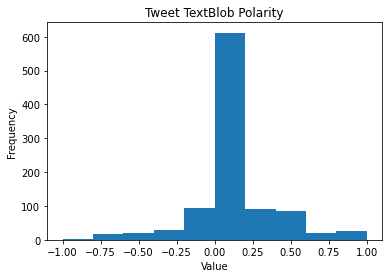

In [25]:
# View tweet polarity
plt.hist(test_df['TB_polarity'])
#plt.xticks(range(-1,2))
plt.title('Tweet TextBlob Polarity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


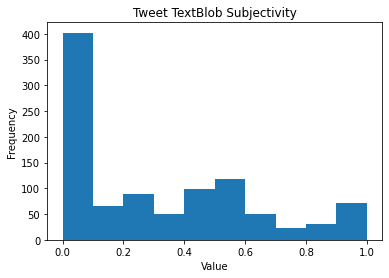

In [26]:
# View tweet subjectivity
plt.hist(test_df['TB_subjectivity'])
plt.title('Tweet TextBlob Subjectivity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Sentiment Classification - Vader

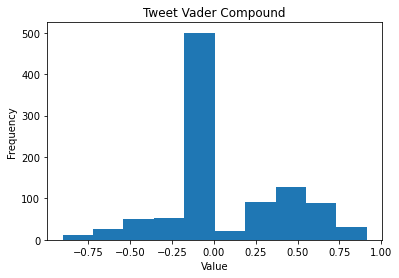

In [27]:
# View tweet compound
plt.hist(test_df['compound'])
#plt.xticks(range(-1,2))
plt.title('Tweet Vader Compound')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Compare All Three Sentiment Analyzers

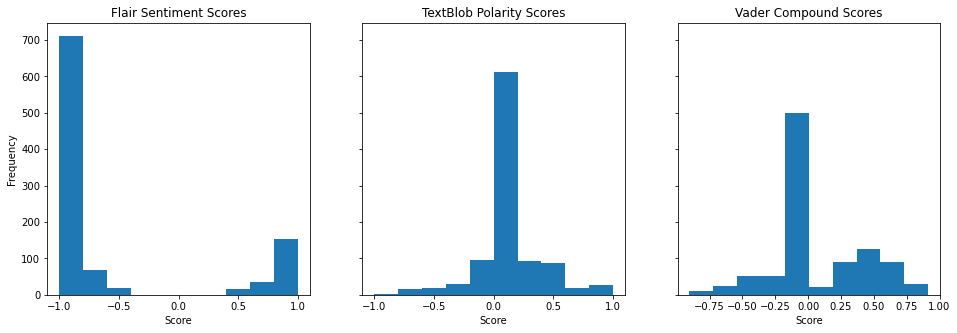

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(16,5))
ax1.hist(test_df['flair_sentiment_score'])
ax1.set_title('Flair Sentiment Scores')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Score')

ax2.hist(test_df['TB_polarity'])
ax2.set_title('TextBlob Polarity Scores')
ax2.set_xlabel('Score')

ax3.hist(test_df['compound'])
ax3.set_title('Vader Compound Scores')
ax3.set_xlabel('Score')
plt.show()

In [29]:
# Show negative, neutral, and positive values
print('Flair Values:')
print('Number of Negative Sentiment Values:',test_df.loc[test_df.flair_sentiment_score<0].shape[0])
print('Number of Positive Sentiment Values:',test_df.loc[test_df.flair_sentiment_score>0].shape[0])
print('Number of Neutral Sentiment Values:',test_df.loc[test_df.flair_sentiment_score==0].shape[0])
print('\nTextBlob Values:')
print('Number of Negative Sentiment Values:',test_df.loc[test_df.TB_polarity<0].shape[0])
print('Number of Positive Sentiment Values:',test_df.loc[test_df.TB_polarity>0].shape[0])
print('Number of Neutral Sentiment Values:',test_df.loc[test_df.TB_polarity==0].shape[0])
print('\nVader Values:')
print('Number of Negative Sentiment Values:',test_df.loc[test_df.compound<0].shape[0])
print('Number of Positive Sentiment Values:',test_df.loc[test_df.compound>0].shape[0])
print('Number of Neutral Sentiment Values:',test_df.loc[test_df.compound==0].shape[0])

Flair Values:
Number of Negative Sentiment Values: 798
Number of Positive Sentiment Values: 202
Number of Neutral Sentiment Values: 0

TextBlob Values:
Number of Negative Sentiment Values: 164
Number of Positive Sentiment Values: 351
Number of Neutral Sentiment Values: 485

Vader Values:
Number of Negative Sentiment Values: 162
Number of Positive Sentiment Values: 361
Number of Neutral Sentiment Values: 477


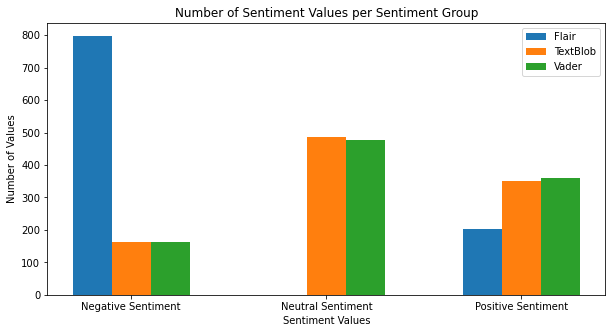

In [30]:
# Plot above values side by side in bar chart
X = ['Negative Sentiment','Neutral Sentiment','Positive Sentiment']
Flair = [test_df.loc[test_df.flair_sentiment_score<0].shape[0],test_df.loc[test_df.flair_sentiment_score==0].shape[0],
        test_df.loc[test_df.flair_sentiment_score>0].shape[0]]
Textblob = [test_df.loc[test_df.TB_polarity<0].shape[0],test_df.loc[test_df.TB_polarity==0].shape[0],
            test_df.loc[test_df.TB_polarity>0].shape[0]]
Vader = [test_df.loc[test_df.compound<0].shape[0],test_df.loc[test_df.compound==0].shape[0],
        test_df.loc[test_df.compound>0].shape[0]]
  
X_axis = np.arange(len(X))
plt.rcParams["figure.figsize"] = (10, 5)  
plt.bar(X_axis - 0.2, Flair, 0.2, label = 'Flair')
plt.bar(X_axis, Textblob, 0.2, label = 'TextBlob')
plt.bar(X_axis + 0.2, Vader, 0.2, label = 'Vader')
plt.xticks(X_axis, X)
plt.xlabel("Sentiment Values")
plt.ylabel("Number of Values")
plt.title("Number of Sentiment Values per Sentiment Group")
plt.legend()


# Observe differences among individual tweets

In [31]:
# Look at individual tweets and scores side by side
# see how scores are trending with stock prices

Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num', 'ticker_symbol', 'company_name', 'day_date', 'close_value',
       'volume', 'open_value', 'high_value', 'low_value', 'return',
       'sent_scores', 'compound', 'tweet_sent', 'positive', 'negative',
       'reaction_num', 'clean_tweet', 'flair_sentiment_score', 'TB_polarity',
       'TB_subjectivity'],
      dtype='object')

In [32]:
# Drop duplicate columns and look only at cleansed tweet and sentiment scores
condensed_df = test_df[['ticker_symbol','clean_tweet','flair_sentiment_score','TB_polarity','TB_subjectivity','compound']]
condensed_df.drop_duplicates(subset='clean_tweet',inplace=True)
condensed_df.rename(columns={'compound':'vader_compound'},inplace=True)
condensed_df.head()

/Users/sumedhshah1994/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/sumedhshah1994/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ticker_symbol,clean_tweet,flair_sentiment_score,TB_polarity,TB_subjectivity,vader_compound
0,AAPL,I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,-0.999651,0.05,0.516667,0.7769
1,AAPL,"Week's Winners and Losers: Apple Gels, Marriott Jams http://aol.it/1tq4V9S via $AAPL $MU $MAR",-0.911887,-0.20,0.200000,-0.0772
2,AAPL,GOOD LUCK“: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,-0.999532,0.15,0.600000,0.5622
3,AAPL,"Commented on: ""2015 Will Be Apple's Year: Raising Price Target To $174"" http://seekingalpha.com/a/1nr6d $AAPL",-0.986848,0.00,0.000000,0.0000
4,AAPL,The Closing Bell is out! http://paper.li/BonaCapital/1408551985… $EURUSD $GBPUSD $USDJPY $AUDUSD $SPY $TWTR $GPRO $YHOO $LNKD $FB $AAPL $BRD $CAT $WLT $LNKD,-0.578818,0.00,0.000000,0.0000


In [37]:
# Show negative values as red and positive values as green
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [35]:
# Sort dataframe by flair sentiment score
sorted_df = condensed_df.sort_values("flair_sentiment_score",ascending=True)
sorted_df.style.applymap(_color_red_or_green,subset=pd.IndexSlice[:,['flair_sentiment_score','TB_polarity','TB_subjectivity','vader_compound']])


,ticker_symbol,clean_tweet,flair_sentiment_score,TB_polarity,TB_subjectivity,vader_compound
987,AAPL,$AAPL 30-Minute Chart. Into final stretch of trading today looks like a bear flag breakdown candidate. Weak all day. http://stks.co/p1EGy,-0.999993,-0.187500,0.812500,-0.102700
225,AAPL,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NVO are great investments for your grandpa. I'll stick to $ECIG, $GWPH, and $ERBB, etc.",-0.999991,0.800000,0.750000,0.765000
717,AAPL,"Algo's have a good game right now... attack $AAPL, let everything else follow, suck in ""momo shorts"" then hit Full Reverse",-0.999990,0.233929,0.521429,-0.476700
453,AAPL,"Has ""everyone"" tried a ? Easy to tweet predictions ab future tech, Much harder to innovate. $AAPL should buy #Pebble",-0.999989,0.111111,0.319444,0.726900
816,AAPL,looks like 109.50+ is written all over it.. $AAPL,-0.999988,0.000000,0.000000,0.361200
570,AAPL,Apple Inc. is doomed. $AAPL dropped by 1.01%! Currently priced at 109.26. http://ift.tt/e6XGix #AAPL,-0.999987,0.000000,0.400000,-0.669600
520,AAPL,"ERASE $AAPL from that list, up early sold off quickly getting very old, maybe the new year will change that continued pattern",-0.999985,0.174924,0.378636,0.000000
817,AAPL,Sour Apple: Stock falls into 10% correction! (Photo: AP) $aapl http://usat.ly/1tylUHd,-0.999984,-0.187500,0.100000,0.000000
719,AAPL,"$AAPL sold 1/2 110p @ 2.10 avg for nearly 100%. These were worthless just a few days ago, so I'm not getting greedy. I'm hoping for 106 area",-0.999979,-0.300000,0.466667,0.217300
196,AAPL,"Consumer sat survey stories=wrong RT New hed, same story: The Apple press goes off half-cocked. Again http://fortune.com/2015/01/01/did-samsung-really-overtake-apple-in-consumer-satisfaction/… $AAPL",-0.999977,0.068182,0.289773,0.000000


In [41]:
# Look at tweets whose sentiment scores among the models are different signs (i.e. negative score vs positive score)
disparity_df = condensed_df[(condensed_df.flair_sentiment_score < 0) & 
                           (condensed_df.TB_polarity>0) & (condensed_df.vader_compound>0)]
disparity_df.style.applymap(_color_red_or_green,subset=pd.IndexSlice[:,['flair_sentiment_score','TB_polarity','TB_subjectivity','vader_compound']])

,ticker_symbol,clean_tweet,flair_sentiment_score,TB_polarity,TB_subjectivity,vader_compound
0,AAPL,I just expected something more extravagant. Like $aapl buys $tsla and develops the most bad ass car,-0.999651,0.050000,0.516667,0.776900
2,AAPL,GOOD LUCK“: Apple is being sued for falsely advertising the storage capacity of iPhones: http://on.wsj.com/13TL64c $AAPL”,-0.999532,0.150000,0.600000,0.562200
11,AAPL,"$AAPL stock content, charts, analysis, & more - Free - http://forex-trading-unlocked.com/AAPL-Apple-Stock.html…",-0.690140,0.450000,0.650000,0.556300
15,AAPL,"For a Limited Time, Get free Premium Picks for LIFE! $GILD $ARWR $AAPL http://topflighttrades.com",-0.952398,0.214286,0.471429,0.400300
20,AAPL,"$AAPL stock content, charts, analysis, & more - Free -",-0.856016,0.450000,0.650000,0.556300
31,AAPL,Intel: $100 Windows 8.1 Smart TV Dongles Are Now Available http://seekingalpha.com/article/2791935-intel-100-windows-8_1-smart-tv-dongles-are-now-available?source=feed_f… $AAPL #APPLE $ADBE $AMZN $GOOG $MSFT $QCOM $INTC,-0.664908,0.307143,0.521429,0.401900
32,AAPL,"$AAPL News: ""Intel: $100 Windows 8.1 Smart TV Dongles Are Now Available $AAPL …"" http://seekingalpha.com/article/2791935-intel-100-windows-8_1-smart-tv-dongles-are-now-available?source=feed_f… Board view: ?symbol=AAPL…",-0.986071,0.307143,0.521429,0.469600
48,AAPL,Significant activity on social media: $QUAD $WAG $IGN $TWTR $GILD $AAPL. Trade on market sentiment http://bit.ly/1evwc2c #tradeSentiment,-0.986272,0.204167,0.470833,0.202300
52,AAPL,Analyst Report on Top Stock Market Options for 2015 Read Here $AAPL $AMZN $BABA $EBAY http://goo.gl/puLqYi,-0.989222,0.500000,0.500000,0.202300
58,AAPL,Apple pushes ‘Start Something New' webpage worldwide to highlight iOS'… http://dlvr.it/7zjbGF #iDownloadBlog $AAPL,-0.596991,0.136364,0.454545,0.340000
